In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = sns.load_dataset('iris')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


***CHECKING MISSING VALUES***

In [4]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

***DATA SEPARATION***

In [5]:
x = df.iloc[:,0:4]
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
y = df.iloc[:,4]
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [9]:
df.shape

(150, 5)

***TRAIN TEST SPLIT***

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 101)
x_train

,sepal_length,sepal_width,petal_length,petal_width
104,6.5,3.0,5.8,2.2
89,5.5,2.5,4.0,1.3
116,6.5,3.0,5.5,1.8
82,5.8,2.7,3.9,1.2
112,6.8,3.0,5.5,2.1
...,...,...,...,...
63,6.1,2.9,4.7,1.4
70,5.9,3.2,4.8,1.8
81,5.5,2.4,3.7,1.0
11,4.8,3.4,1.6,0.2


***DECISION TREE CLASSIFIER***

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [12]:
df = DecisionTreeClassifier()
df.fit(x_train,y_train)
y_predict = df.predict(x_test)
y_predict

array(['setosa', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'setosa', 'virginica', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'setosa'],
      dtype=object)

***ACCURACY SCORE***

In [13]:
accuracy_score(y_test,y_predict)

0.9666666666666667

***CONFUSION MATRIX***

In [14]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predict)
cm

array([[10,  0,  0],
       [ 0, 12,  0],
       [ 0,  1,  7]])

***CLASSIFICATION REPORT***

In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.92      1.00      0.96        12
   virginica       1.00      0.88      0.93         8

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



***DECISION TREE PLOT***

[Text(0.5, 0.9, 'X[2] <= 2.45\ngini = 0.666\nsamples = 120\nvalue = [40, 38, 42]'),
 Text(0.4230769230769231, 0.7, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.5769230769230769, 0.7, 'X[3] <= 1.75\ngini = 0.499\nsamples = 80\nvalue = [0, 38, 42]'),
 Text(0.3076923076923077, 0.5, 'X[2] <= 4.95\ngini = 0.139\nsamples = 40\nvalue = [0, 37, 3]'),
 Text(0.15384615384615385, 0.3, 'X[3] <= 1.65\ngini = 0.054\nsamples = 36\nvalue = [0, 35, 1]'),
 Text(0.07692307692307693, 0.1, 'gini = 0.0\nsamples = 35\nvalue = [0, 35, 0]'),
 Text(0.23076923076923078, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.3, 'X[3] <= 1.55\ngini = 0.5\nsamples = 4\nvalue = [0, 2, 2]'),
 Text(0.38461538461538464, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.5384615384615384, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.8461538461538461, 0.5, 'X[2] <= 4.85\ngini = 0.049\nsamples = 40\nvalue = [0, 1, 39]'),
 Text(0.7692307692307693, 0.3, 'X[1] <= 

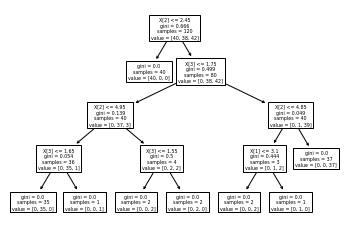

In [16]:
from sklearn import tree
tree.plot_tree(df)

***CONCLUSION***

**I have performed Iris Flower Classification using Decison Tree Classifier.**

 **Accuracy of Decision Tree Classifier is 97%**.